In [1]:
# %matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#File Imports
oews_state=pd.read_csv('data_folder/data_scientist_states_2020_OES_Report.csv')
oews_industry=pd.read_csv('data_folder/data_scientist_industry_2020_OES_Report.csv')
projections_industry=pd.read_csv('data_folder/Employment_Projections_Data_Scientist_per_Industry.csv')
education=pd.read_csv('data_folder/bachelors_per_stae_per_field.csv')
consumer_price_index=pd.read_csv('data_folder/Cost_of_Living_Data.csv')

In [3]:
#Clean oews_state datafile
oews_state.drop(labels=[0,1,2,3,52,53,54,55,56,57,58,59],axis=0,inplace=True)
header=oews_state.iloc[0,:]
oews_state.drop(labels=4,axis=0,inplace=True)
oews_state=oews_state.reset_index()
del oews_state['index']
oews_state.columns=header

In [4]:
#Reorganize oews_state columns
oews_state.columns
oews_state=oews_state.rename(columns={'Area Name':'State','Employment(1)':'Employment',
                                      'Annual 10th percentile wage(2)':'Annual 10th Percentile Wage',
                                      'Annual 25th percentile wage(2)':'Annual 25th Percentile Wage',
                                      'Annual median wage(2)':'Annual Median Wage',
                                      'Annual 75th percentile wage(2)':'Annual 75th Percentile Wage',
                                      'Annual 90th percentile wage(2)':'Annual 90th Percentile Wage',
                                      'Employment per 1,000 jobs':'Employment per 1,000 Jobs'})

oews_state=oews_state[['State','Employment','Employment per 1,000 Jobs','Annual Median Wage','Annual 10th Percentile Wage',
                      'Annual 25th Percentile Wage','Annual 75th Percentile Wage','Annual 90th Percentile Wage',
                       'Location Quotient']]

In [5]:
sep_state=oews_state['State'].str.split('(', n=-1, expand=True)
oews_state['State']=sep_state[0]
oews_state_clean_df=oews_state

In [6]:
#Cleaned oews_state_clean_df
oews_state_clean_df

4,State,Employment,"Employment per 1,000 Jobs",Annual Median Wage,Annual 10th Percentile Wage,Annual 25th Percentile Wage,Annual 75th Percentile Wage,Annual 90th Percentile Wage,Location Quotient
0,Alabama,210,0.113,90590,56510,74460,105650,121870,0.26
1,Alaska,170,0.561,74110,53720,61780,90980,103100,1.31
2,Arizona,1400,0.494,111900,61290,87430,130240,153540,1.15
3,Arkansas,260,0.217,109020,80310,94250,134290,160980,0.50
4,California,9510,0.579,127310,69340,87940,162630,197890,1.35
5,Colorado,1260,0.489,92320,53780,69400,121000,151940,1.14
6,Connecticut,860,0.556,96320,45950,69940,119420,141800,1.30
7,District of Columbia,590,0.858,99240,67190,79860,131780,159550,2.00
8,Florida,2430,0.288,85540,51600,59720,118450,144390,0.67
9,Georgia,2310,0.536,85600,39100,56010,113170,139990,1.25


In [7]:
#Clean oews_industry datafile
oews_industry=oews_industry.dropna()
header=oews_industry.iloc[0,:]
oews_industry.drop(labels=4,axis=0,inplace=True)
oews_industry=oews_industry.reset_index()
del oews_industry['index']
oews_industry.columns=header

In [8]:
#Reorganize oews_industry columns
oews_industry.columns
oews_industry=oews_industry.rename(columns={'Occupation (SOC code)':'Industry (SOC Code)','Employment(1)':'Employment','Annual median wage(2)':'Annual Median Wage',
                              'Annual 10th percentile wage(2)':'Annual 10th Percentile Wage',
                              'Annual 25th percentile wage(2)':'Annual 25th Percentile Wage',
                              'Annual 75th percentile wage(2)':'Annual 75th Percentile Wage',
                              'Annual 90th percentile wage(2)':'Annual 90th Percentile Wage'})
oews_industry=oews_industry[['Industry (SOC Code)','Employment','Annual Median Wage','Annual 10th Percentile Wage',
                             'Annual 25th Percentile Wage','Annual 75th Percentile Wage','Annual 90th Percentile Wage']]

# oews_industry_clean_df=oews_industry

In [9]:
sep_industry=oews_industry['Industry (SOC Code)'].str.split('(', n=-1, expand=True)
oews_industry['Industry (SOC Code)']=sep_industry[0]
oews_industry=oews_industry.rename(columns={'Industry (SOC Code)':'Industry Title'})
oews_industry_clean_df=oews_industry.drop_duplicates()

In [10]:
#Cleaned oews_industry_clean_df
oews_industry_clean_df

4,Industry Title,Employment,Annual Median Wage,Annual 10th Percentile Wage,Annual 25th Percentile Wage,Annual 75th Percentile Wage,Annual 90th Percentile Wage
0,"Cross-industry, Private, Federal, State, and L...",59680,98230,52950,71790,130370,165230
1,"Cross-industry, Private Ownership Only",54970,101340,55110,74480,132960,167190
2,Sector 21 - Mining,190,99110,59140,75140,122940,144480
3,Oil and Gas Extraction,190,99120,58980,74980,122780,144860
5,"Electric Power Generation, Transmission and Di...",-,82950,53690,65850,116480,141920
...,...,...,...,...,...,...,...
154,Federal Executive Branch,690,40570,31210,31680,51070,140450
155,"Federal government, including USPS",690,40570,31210,31680,51070,140450
156,"State Government, including schools and hospitals",3270,72710,45130,57730,86430,103960
157,"Local Government, excluding schools and hospit...",480,73890,42460,53800,93570,110700


In [11]:
# Find 'Industry Title' with 'computer' in it
is_comp = oews_industry_clean_df['Industry Title'].str.lower().str.contains('computer')
sum(is_comp)
oews_industry_clean_df['Industry Title'][is_comp].to_list()

['Computer and Electronic Product Manufacturing',
 'Computer and Peripheral Equipment Manufacturing',
 'Computer Systems Design and Related Services',
 'Business Schools and Computer and Management Training',
 'Business schools and computer and management training - Privately owned']

In [12]:
oews_industry_clean_df[ oews_industry_clean_df['Industry Title'] == 'Computer Systems Design and Related Services' ].T

,88
4,
Industry Title,Computer Systems Design and Related Services
Employment,9100
Annual Median Wage,106010
Annual 10th Percentile Wage,55810
Annual 25th Percentile Wage,74870
Annual 75th Percentile Wage,140890
Annual 90th Percentile Wage,178170


In [13]:

def convert_to_num(x):
    if x.strip() == '-':
        return np.nan
    else:
        return float(x)
# data is still a string rather than a number
# all columns except for 'Industry Title'
numeric_columns = [ c for c in oews_industry_clean_df.columns if c!='Industry Title']
for c in numeric_columns:
    oews_industry_clean_df[c] = oews_industry_clean_df[c].apply(convert_to_num)

<ipython-input-13-6908b03ad788>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oews_industry_clean_df[c] = oews_industry_clean_df[c].apply(convert_to_num)


In [14]:
#oews_industry_clean_df.dtypes   # .loc[0, 'Employment']

In [15]:
sector_df = oews_industry_clean_df[ 
    oews_industry_clean_df['Industry Title'].str.contains('Sector') ]
sector_df = sector_df.copy()
sector_df.dropna(inplace=True)

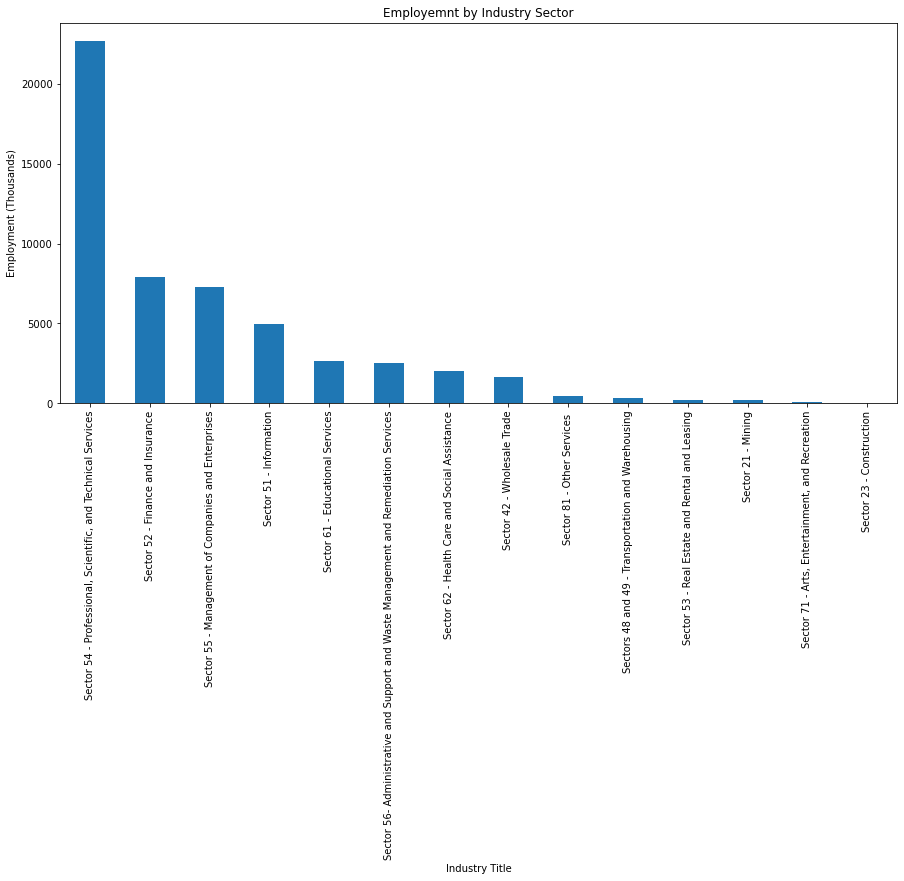

In [16]:
#oews_industry_clean_df.plot.bar(x='Industry Title', y='Employment')
ax = sector_df.nlargest(
    20, columns=['Employment']).plot.bar(
    x='Industry Title', y='Employment', figsize=(15,7))
ax.set_title('Employemnt by Industry Sector')
ax.set_ylabel('Employment (Thousands)')
ax.get_legend().remove()

In [17]:
#Clean employment projections per industry data file
del projections_industry['Industry Sort']
del projections_industry['Industry Code']
projections_industry['2019 Employment']=projections_industry['2019 Employment']*1000
projections_industry['Projected 2029 Employment']=projections_industry['Projected 2029 Employment']*1000
projections_industry['Employment Change, 2019-2029']=projections_industry['Employment Change, 2019-2029']*1000
projections_industry_clean_df=projections_industry

In [18]:
#Cleaned projections_industry_clean_df
projections_industry_clean_df.head(10)

,Industry Title,Industry Type,2019 Employment,2019 Percent of Occupation,2019 Percent of Industry,Projected 2029 Employment,Projected 2029 Percent of Occupation,Projected 2029 Percent of Industry,"Employment Change, 2019-2029","Employment Percent Change, 2019-2029",Display Level
0,Total employment,Summary,33200.0,100.0,0.0,43400.0,100.0,0.0,10300.0,30.9,0
1,Self-employed workers,Line Item,1000.0,3.0,0.0,1100.0,2.4,0.0,100.0,8.0,1
2,Total wage and salary employment,Summary,32200.0,97.0,0.0,42400.0,97.6,0.0,10200.0,31.6,1
3,"Mining, quarrying, and oil and gas extraction",Summary,100.0,0.4,0.0,100.0,0.3,0.0,0.0,4.3,2
4,Oil and gas extraction,Line Item,100.0,0.4,0.1,100.0,0.3,0.1,0.0,4.3,3
5,Utilities,Summary,100.0,0.2,0.0,100.0,0.1,0.0,0.0,7.1,2
6,Utilities,Summary,100.0,0.2,0.0,100.0,0.1,0.0,0.0,7.1,3
7,Chemical manufacturing,Summary,700.0,2.1,0.1,900.0,2.1,0.1,200.0,25.1,3
8,Pharmaceutical and medicine manufacturing,Line Item,700.0,2.0,0.2,800.0,1.9,0.3,200.0,25.7,4
9,"Chemical manufacturing (3251,2,3,9)",Line Item,100.0,0.2,0.0,100.0,0.2,0.0,0.0,18.9,4


In [19]:
# Find 'Industry Title' with 'computer' in it
is_comp = projections_industry_clean_df['Industry Title'].str.lower().str.contains('computer')
projections_industry_clean_df['Industry Title'][is_comp].to_list()

['Computer and electronic product manufacturing',
 'Computer systems design and related services']

In [20]:
# Note: capitalization is different in this dataframe compared to the above
computer_only_projection = projections_industry_clean_df[ 
    projections_industry_clean_df['Industry Title'] == 'Computer systems design and related services' ].T
computer_only_projection

,59
Industry Title,Computer systems design and related services
Industry Type,Line Item
2019 Employment,4500
2019 Percent of Occupation,13.5
2019 Percent of Industry,0.2
Projected 2029 Employment,6700
Projected 2029 Percent of Occupation,15.4
Projected 2029 Percent of Industry,0.2
"Employment Change, 2019-2029",2200
"Employment Percent Change, 2019-2029",48.7


Text(0.5, 1.0, 'Employment and Projection for\nComputer systems design and related services')

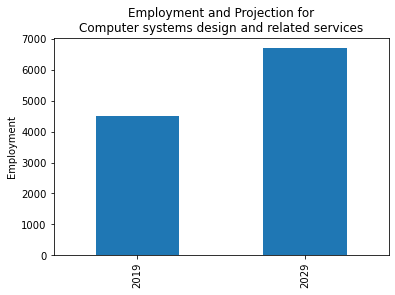

In [21]:
temp = computer_only_projection.loc[ ['2019 Employment', 'Projected 2029 Employment'] ]
temp.index = ['2019', '2029']
ax = temp.plot.bar()
ax.set_ylabel('Employment')
ax.get_legend().remove()
ax.set_title('Employment and Projection for\nComputer systems design and related services')

In [22]:
# Find 'Industry Title' with 'math' in it
is_comp = projections_industry_clean_df['Industry Title'].str.lower().str.contains('math')
projections_industry_clean_df['Industry Title'][is_comp].to_list()

[]

In [23]:
# goal is data science market
# future trends for job market in data science


In [24]:
#Clean education per state datafile
education=education[[
    'GEO_ID',
    'NAME',
    'B15010_001E',
    'B15010_002E',
    'B15010_003E',
    'B15010_004E',
    'B15010_012E',
    'B15010_013E',
    'B15010_014E',
    'B15010_015E',
    'B15010_016E']]

education=education.dropna()
header=education.iloc[0,:]
education.drop(labels=0,axis=0,inplace=True)
education=education.reset_index()
del education['index']
education.drop(labels=51,axis=0,inplace=True)
education.columns=header

In [25]:
#Reorganize education columns
education_clean_df=education.rename(columns={
    'id':'Geo ID',
    'Geographic Area Name':'State',
    'Estimate!!Total:':'Total w/ Degree',
    'Estimate!!Total:!!Science and Engineering!!Computers, Mathematics and Statistics':'Computers, Mathematics and Statistics',
    'Estimate!!Total:!!Science and Engineering!!Biological, Agricultural, and Environmental Sciences':'Biological, Agricultural, and Environmental Sciences',
    'Estimate!!Total:!!Science and Engineering!!Physical and Related Sciences':'Physical and Related Sciences',
    'Estimate!!Total:!!Arts, Humanities, and Other!!Literature and Languages':'Literature and Languages',
    'Estimate!!Total:!!Arts, Humanities, and Other!!Liberal Arts and History':'Liberal Arts and History',
    'Estimate!!Total:!!Arts, Humanities, and Other!!Visual and Performing Arts':'Visual and Performing Arts',
    'Estimate!!Total:!!Arts, Humanities, and Other!!Communications':'Communications',
    'Estimate!!Total:!!Arts, Humanities, and Other!!Other':'All Other'
})

In [26]:
#Cleaned education file
education_clean_df

,Geo ID,State,Total w/ Degree,"Computers, Mathematics and Statistics","Biological, Agricultural, and Environmental Sciences",Physical and Related Sciences,Literature and Languages,Liberal Arts and History,Visual and Performing Arts,Communications,All Other
0,0400000US01,Alabama,885357,35624,51733,25051,19816,38296,23607,28095,62325
1,0400000US02,Alaska,146157,5132,14014,8095,6401,8636,4790,3311,11628
2,0400000US04,Arizona,1492158,68464,92835,44408,51202,61374,55900,56241,93000
3,0400000US05,Arkansas,475367,19902,35631,12201,14045,22599,14528,14656,29757
4,0400000US06,California,9428484,533563,636542,291237,461068,507152,513369,416285,518193
5,0400000US08,Colorado,1695602,81960,121643,63542,74799,72658,75553,76994,93470
6,0400000US09,Connecticut,994548,41272,53696,31605,57309,51834,46687,34873,55960
7,0400000US10,Delaware,228199,9812,13554,7222,9255,13518,6268,6482,17521
8,0400000US11,District of Columbia,301429,9934,16637,7063,21617,28549,11450,16804,11823
9,0400000US12,Florida,4753637,191974,243513,126992,154164,189883,152511,173690,283237


In [27]:
# data is still a string rather than a number
# all columns except for 'Geo ID' and 'State'
numeric_columns = [ c for c in education_clean_df.columns if c not in ['Geo ID', 'State']]
for c in numeric_columns:
    education_clean_df[c] = education_clean_df[c].apply(convert_to_num)
numeric_columns.remove('Total w/ Degree')

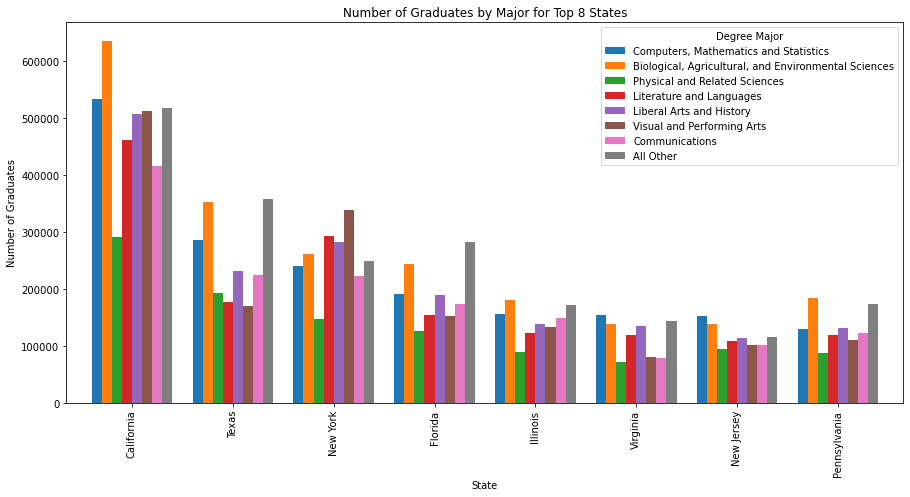

In [28]:
ax = education_clean_df.nlargest(8, columns=['Computers, Mathematics and Statistics']).plot.bar(
    x='State', y=numeric_columns, figsize=(15,7), width=0.8)   
# 'Computers, Mathematics and Statistics'
ax.set_ylabel('Number of Graduates')
ax.set_title('Number of Graduates by Major for Top 8 States')
ax.legend(title='Degree Major');

In [29]:
#Reorganize CPI data file
consumer_price_index_df=consumer_price_index.rename(columns={
    'costIndex':'Total Cost Index',
    'groceryCost':'Grocery Cost',
    'housingCost':'Housing Cost',
    'utilitiesCost':'Utilities Cost',
    'transportationCost':'Transportation Cost',
    'miscCost':'Miscellaneous Cost'})

In [30]:
#Final CPI file
consumer_price_index_df

,State,Total Cost Index,Grocery Cost,Housing Cost,Utilities Cost,Transportation Cost,Miscellaneous Cost
0,Mississippi,86.1,91.6,70.1,89.1,89.2,91.4
1,Arkansas,86.9,92.0,73.9,91.8,83.6,85.6
2,Oklahoma,87.0,95.4,71.9,94.1,89.5,93.2
3,Missouri,87.1,96.6,70.6,99.6,87.3,95.7
4,New Mexico,87.5,100.9,77.7,87.9,91.6,100.1
5,Tennessee,88.7,93.3,80.2,93.4,89.7,88.5
6,Michigan,88.9,89.3,75.2,97.3,97.4,93.0
7,Kansas,89.0,91.9,73.8,103.0,92.3,98.9
8,Georgia,89.2,96.9,73.8,92.4,97.6,98.5
9,Wyoming,89.3,98.7,72.3,87.3,99.3,94.9


In [31]:
#Export CSV files
oews_state_clean_df.to_csv('data_folder/clean_data_folder/OEWS_per_state.csv')
oews_industry_clean_df.to_csv('data_folder/clean_data_folder/OEWS_per_industry.csv')
projections_industry_clean_df.to_csv('data_folder/clean_data_folder/employment_projections_industry.csv')
education_clean_df.to_csv('data_folder/clean_data_folder/degree_per_state.csv')
consumer_price_index_df.to_csv('data_folder/clean_data_folder/consumer_price_index.csv')

In [32]:
#Merge on state
oews_state_clean_df
education_clean_df
consumer_price_index_df
state_oews_education_df=pd.merge(oews_state_clean_df,education_clean_df, on='State', how='outer')
state_oews_education_df
state_oews_cpi_education_df=pd.merge(state_oews_education_df,consumer_price_index_df, on='State', how='outer')
state_oews_cpi_education_df

,State,Employment,"Employment per 1,000 Jobs",Annual Median Wage,Annual 10th Percentile Wage,Annual 25th Percentile Wage,Annual 75th Percentile Wage,Annual 90th Percentile Wage,Location Quotient,Geo ID,...,Liberal Arts and History,Visual and Performing Arts,Communications,All Other,Total Cost Index,Grocery Cost,Housing Cost,Utilities Cost,Transportation Cost,Miscellaneous Cost
0,Alabama,210,0.113,90590,56510,74460,105650,121870,0.26,0400000US01,...,38296.0,23607.0,28095.0,62325.0,89.3,97.4,71.5,103.3,88.6,90.8
1,Alaska,170,0.561,74110,53720,61780,90980,103100,1.31,0400000US02,...,8636.0,4790.0,3311.0,11628.0,129.9,134.2,133.9,154.2,130.8,150.9
2,Arizona,1400,0.494,111900,61290,87430,130240,153540,1.15,0400000US04,...,61374.0,55900.0,56241.0,93000.0,97.0,96.9,91.7,107.4,109.6,94.7
3,Arkansas,260,0.217,109020,80310,94250,134290,160980,0.50,0400000US05,...,22599.0,14528.0,14656.0,29757.0,86.9,92.0,73.9,91.8,83.6,85.6
4,California,9510,0.579,127310,69340,87940,162630,197890,1.35,0400000US06,...,507152.0,513369.0,416285.0,518193.0,151.7,121.4,227.3,117.7,138.9,114.5
5,Colorado,1260,0.489,92320,53780,69400,121000,151940,1.14,0400000US08,...,72658.0,75553.0,76994.0,93470.0,105.6,102.5,119.0,88.4,101.2,102.9
6,Connecticut,860,0.556,96320,45950,69940,119420,141800,1.30,0400000US09,...,51834.0,46687.0,34873.0,55960.0,127.7,114.2,144.7,128.1,111.8,113.7
7,District of Columbia,590,0.858,99240,67190,79860,131780,159550,2.00,0400000US11,...,28549.0,11450.0,16804.0,11823.0,NaN,NaN,NaN,NaN,NaN,NaN
8,Florida,2430,0.288,85540,51600,59720,118450,144390,0.67,0400000US12,...,189883.0,152511.0,173690.0,283237.0,97.9,104.0,95.4,102.2,96.7,96.9
9,Georgia,2310,0.536,85600,39100,56010,113170,139990,1.25,0400000US13,...,94921.0,81530.0,96942.0,140791.0,89.2,96.9,73.8,92.4,97.6,98.5


In [33]:
state_oews_cpi_education_df.columns
state_oews_cpi_education_df=state_oews_cpi_education_df[[
    'Geo ID',
    'State',
    'Employment', 
    'Employment per 1,000 Jobs',
    'Annual Median Wage', 
    'Annual 10th Percentile Wage',
    'Annual 25th Percentile Wage', 
    'Annual 75th Percentile Wage',
    'Annual 90th Percentile Wage', 
    'Location Quotient',
    'Total Cost Index', 
    'Grocery Cost',
    'Housing Cost', 
    'Utilities Cost', 
    'Transportation Cost',
    'Miscellaneous Cost',
    'Total w/ Degree', 
    'Computers, Mathematics and Statistics',
    'Biological, Agricultural, and Environmental Sciences',
    'Physical and Related Sciences', 
    'Literature and Languages',
    'Liberal Arts and History', 
    'Visual and Performing Arts',
    'Communications', 
    'All Other'  
]]
state_oews_cpi_education_df=state_oews_cpi_education_df.sort_values('State')

In [34]:
state_oews_cpi_education_df

,Geo ID,State,Employment,"Employment per 1,000 Jobs",Annual Median Wage,Annual 10th Percentile Wage,Annual 25th Percentile Wage,Annual 75th Percentile Wage,Annual 90th Percentile Wage,Location Quotient,...,Miscellaneous Cost,Total w/ Degree,"Computers, Mathematics and Statistics","Biological, Agricultural, and Environmental Sciences",Physical and Related Sciences,Literature and Languages,Liberal Arts and History,Visual and Performing Arts,Communications,All Other
0,0400000US01,Alabama,210,0.113,90590,56510,74460,105650,121870,0.26,...,90.8,885357.0,35624.0,51733.0,25051.0,19816.0,38296.0,23607.0,28095.0,62325.0
1,0400000US02,Alaska,170,0.561,74110,53720,61780,90980,103100,1.31,...,150.9,146157.0,5132.0,14014.0,8095.0,6401.0,8636.0,4790.0,3311.0,11628.0
2,0400000US04,Arizona,1400,0.494,111900,61290,87430,130240,153540,1.15,...,94.7,1492158.0,68464.0,92835.0,44408.0,51202.0,61374.0,55900.0,56241.0,93000.0
3,0400000US05,Arkansas,260,0.217,109020,80310,94250,134290,160980,0.50,...,85.6,475367.0,19902.0,35631.0,12201.0,14045.0,22599.0,14528.0,14656.0,29757.0
4,0400000US06,California,9510,0.579,127310,69340,87940,162630,197890,1.35,...,114.5,9428484.0,533563.0,636542.0,291237.0,461068.0,507152.0,513369.0,416285.0,518193.0
5,0400000US08,Colorado,1260,0.489,92320,53780,69400,121000,151940,1.14,...,102.9,1695602.0,81960.0,121643.0,63542.0,74799.0,72658.0,75553.0,76994.0,93470.0
6,0400000US09,Connecticut,860,0.556,96320,45950,69940,119420,141800,1.30,...,113.7,994548.0,41272.0,53696.0,31605.0,57309.0,51834.0,46687.0,34873.0,55960.0
47,0400000US10,Delaware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101.6,228199.0,9812.0,13554.0,7222.0,9255.0,13518.0,6268.0,6482.0,17521.0
7,0400000US11,District of Columbia,590,0.858,99240,67190,79860,131780,159550,2.00,...,NaN,301429.0,9934.0,16637.0,7063.0,21617.0,28549.0,11450.0,16804.0,11823.0
8,0400000US12,Florida,2430,0.288,85540,51600,59720,118450,144390,0.67,...,96.9,4753637.0,191974.0,243513.0,126992.0,154164.0,189883.0,152511.0,173690.0,283237.0


In [35]:
#Export CSV file
state_oews_cpi_education_df.to_csv('data_folder/clean_data_folder/state_oews_cpi_education.csv')

In [36]:
url = 'https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv'
state_region_df = pd.read_csv(url)
state_region_df.head(3)

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central


In [37]:
# create a dictionary with states as keys, and the state's region as values
# for exmaple,  state2region['California'] = 'West'
state2region = dict(zip(state_region_df['State'], state_region_df['Region']))

In [38]:
# gp = state_region_df.groupby('Region')['State']
# for region, data in gp:
#     print(f'Region: {region}\n' + '='*60)
#     print(data.to_list())
#     print()

In [39]:
### IMPORTANT ### ONLY RUN ONCE
### IF RUN AGAIN, RUN ENTIRE NOTEBOOK AGAIN
# create a new column which maps the state to the region of that state
# for example, the 'State' of 'California' will have a new 'Region' of 'West'
# because it is in the western part of the united states
education_clean_df['Region'] = education_clean_df['State'].map(state2region)
# Get the column names of the dataframe
columns = education_clean_df.columns.to_list()
# Put 'Region', which is last, into the second index position of column names
columns.insert(2, columns.pop())
columns = columns[1:]  # skip the forst column name, 'Geo ID'
# reorder the columns in the dataframe
education_clean_df = education_clean_df.reindex(columns=columns)
education_clean_df.head()

,State,Region,Total w/ Degree,"Computers, Mathematics and Statistics","Biological, Agricultural, and Environmental Sciences",Physical and Related Sciences,Literature and Languages,Liberal Arts and History,Visual and Performing Arts,Communications,All Other
0,Alabama,South,885357.0,35624.0,51733.0,25051.0,19816.0,38296.0,23607.0,28095.0,62325.0
1,Alaska,West,146157.0,5132.0,14014.0,8095.0,6401.0,8636.0,4790.0,3311.0,11628.0
2,Arizona,West,1492158.0,68464.0,92835.0,44408.0,51202.0,61374.0,55900.0,56241.0,93000.0
3,Arkansas,South,475367.0,19902.0,35631.0,12201.0,14045.0,22599.0,14528.0,14656.0,29757.0
4,California,West,9428484.0,533563.0,636542.0,291237.0,461068.0,507152.0,513369.0,416285.0,518193.0


In [40]:
# columns that are counts of degrees (excluding Total w/ Degree)
columns = ['Computers, Mathematics and Statistics',
         'Biological, Agricultural, and Environmental Sciences',
         'Physical and Related Sciences',
         'Literature and Languages',
         'Liberal Arts and History',
         'Visual and Performing Arts',
         'Communications', 
         'All Other']

In [41]:
# convert into percentages of total degrees per state
total_degrees = education_clean_df[columns].sum(axis=1)
for c in columns:
    education_clean_df[c] = education_clean_df[c] / total_degrees

In [42]:
education_clean_df.head()

,State,Region,Total w/ Degree,"Computers, Mathematics and Statistics","Biological, Agricultural, and Environmental Sciences",Physical and Related Sciences,Literature and Languages,Liberal Arts and History,Visual and Performing Arts,Communications,All Other
0,Alabama,South,885357.0,0.125195,0.181808,0.088038,0.069641,0.134586,0.082963,0.098736,0.219032
1,Alaska,West,146157.0,0.082765,0.226007,0.130550,0.103230,0.139275,0.077249,0.053397,0.187527
2,Arizona,West,1492158.0,0.130800,0.177361,0.084841,0.097821,0.117255,0.106797,0.107448,0.177676
3,Arkansas,South,475367.0,0.121860,0.218168,0.074707,0.085997,0.138373,0.088955,0.089738,0.182202
4,California,West,9428484.0,0.137608,0.164167,0.075111,0.118911,0.130797,0.132400,0.107362,0.133644


Text(0, 0.5, 'Percent of All Degrees Awarded per State')

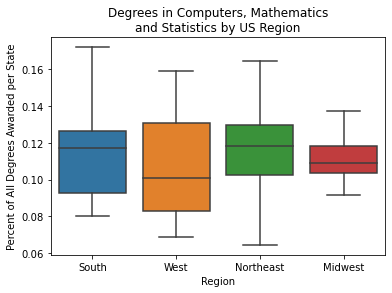

In [43]:
import seaborn as sns
ax = sns.boxplot(
    x='Region', 
    y='Computers, Mathematics and Statistics', 
    data=education_clean_df)
ax.set_title('Degrees in Computers, Mathematics\nand Statistics by US Region')
ax.set_ylabel('Percent of All Degrees Awarded per State')

In [45]:
# Frequency Tables
# States and their occupations or industries